**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [24]:
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
s = json.load( open(puidata+"/fbb_matplotlibrc.json") )
s.pop('svg.embed_char_paths', None)
pl.rcParams.update(s)

In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0, 0.5, 'endogenous')

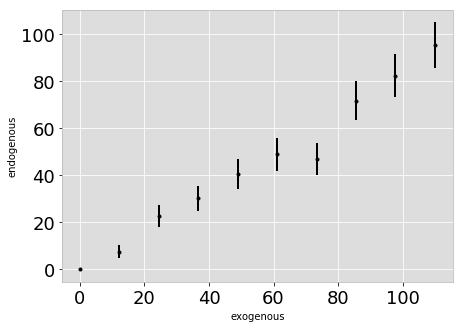

In [21]:
x = np.linspace(0,110,10)
y = line(a=0.75,x=x,b=0,errors=errors)

plt.figure(figsize=(7,5))
plt.errorbar(x,y,yerr=errors(y),fmt=".k")
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

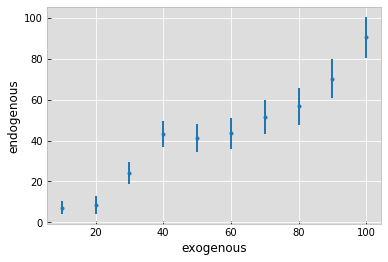

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [27]:
y

array([ 0.        ,  7.61960502, 22.74440084, 30.16615805, 40.40033531,
       48.99415074, 47.07062022, 71.79762315, 82.35034154, 95.27821747])

In [28]:
x

array([  0.        ,  12.22222222,  24.44444444,  36.66666667,
        48.88888889,  61.11111111,  73.33333333,  85.55555556,
        97.77777778, 110.        ])

In [31]:
sm.add_constant(x)

array([[  1.        ,   0.        ],
       [  1.        ,  12.22222222],
       [  1.        ,  24.44444444],
       [  1.        ,  36.66666667],
       [  1.        ,  48.88888889],
       [  1.        ,  61.11111111],
       [  1.        ,  73.33333333],
       [  1.        ,  85.55555556],
       [  1.        ,  97.77777778],
       [  1.        , 110.        ]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [41]:
#THE WRONG WAY
smfitDoneWrong = smf.OLS(y, x).fit()
smfitDoneWrong.summary()

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1177.
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           7.50e-11
Time:                        21:42:05   Log-Likelihood:                -29.603
No. Observations:                  10   AIC:                             61.21
Df Residuals:                       9   BIC:                             61.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8186      0.024     34.306      0.000       0.765       0.873
==============================================================================
Omnibus:                       15.172   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.861
Skew:                          -1.746   Prob(JB):                       0.0196
Kurtosis:                       5.582   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#THE RIGHT WAY
smfitDoneRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitDoneRight.summary()

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     323.0
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           9.42e-08
Time:                        21:41:42   Log-Likelihood:                -29.486
No. Observations:                  10   AIC:                             62.97
Df Residuals:                       8   BIC:                             63.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3176      3.034     -0.434      0.676      -8.314       5.678
x1             0.8356      0.046     17.972      0.000       0.728       0.943
==============================================================================
Omnibus:                       18.860   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.087
Skew:                          -2.011   Prob(JB):                      0.00391
Kurtosis:                       6.229   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

Text(0, 0.5, 'endogenous')

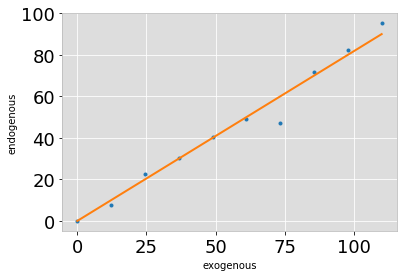

In [42]:
plt.plot(x,y,'.')
pl.plot(x, smfitDoneWrong.fittedvalues, '-')
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

Text(0, 0.5, 'endogenous')

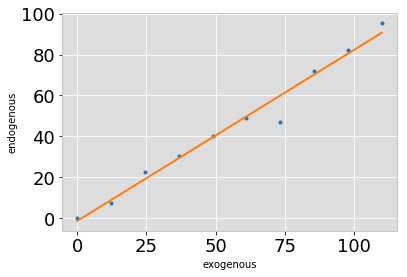

In [40]:
plt.plot(x,y,'.')
pl.plot(x, smfitDoneRight.fittedvalues, '-')
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars
# &
# 6. repeat step 3

Text(0, 0.5, 'endogenous')

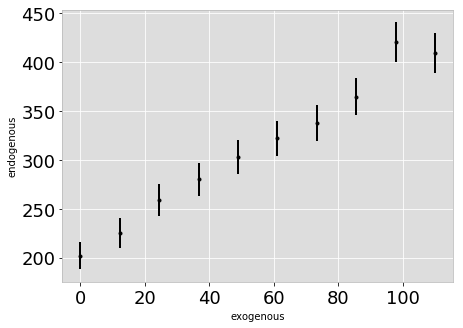

In [43]:
x = np.linspace(0,110,10)
y = line(a=2,x=x,b=101*2,errors=errors)

plt.figure(figsize=(7,5))
plt.errorbar(x,y,yerr=errors(y),fmt=".k")
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Text(0, 0.5, 'endogenous')

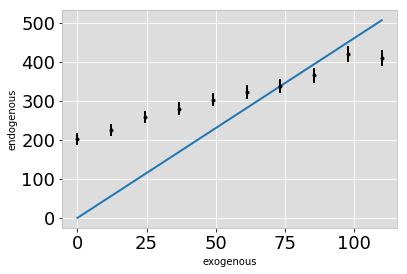

In [44]:
#THE WRONG WAY
smfitDoneWrong = smf.OLS(y, x).fit()
smfitDoneWrong.summary()
plt.errorbar(x,y,yerr=errors(y),fmt=".k")
pl.plot(x, smfitDoneWrong.fittedvalues, '-')
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Text(0, 0.5, 'endogenous')

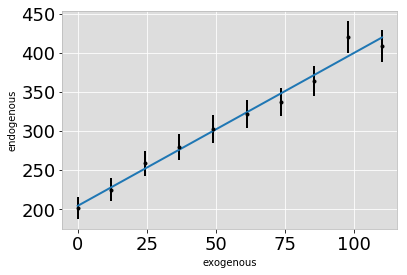

In [45]:
#THE WRONG WAY
smfitDoneRight = smf.OLS(y,sm.add_constant(x)).fit()
smfitDoneRight.summary()
plt.errorbar(x,y,yerr=errors(y),fmt=".k")
pl.plot(x, smfitDoneRight.fittedvalues, '-')
plt.xlabel('exogenous',fontsize=10)
plt.ylabel('endogenous',fontsize=10)

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [52]:
weig = 1.0/errors(x)
weig[weig == inf] = 0 
weig

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.        , 0.28603878, 0.20225996, 0.16514456, 0.14301939,
       0.12792043, 0.11677484, 0.1081125 , 0.10112998, 0.09534626])

In [53]:
smfitWLS = smf.WLS(y, sm.add_constant(x),weights=weig).fit()
smfitWLS.summary()

/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/home/jinalklaulitz/anaconda3/envs/ADS_353/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:719: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            WLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     394.9
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           4.29e-08
Time:                        14:34:50   Log-Likelihood:                   -inf
No. Observations:                  10   AIC:                               inf
Df Residuals:                       8   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        205.2431      5.831     35.200      0.000     191.797     218.689
x1             1.9512      0.098     19.871      0.000       1.725       2.178
==============================================================================
Omnibus:                        5.447   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                2.068
Skew:                           1.074   Prob(JB):                        0.356
Kurtosis:                       3.588   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

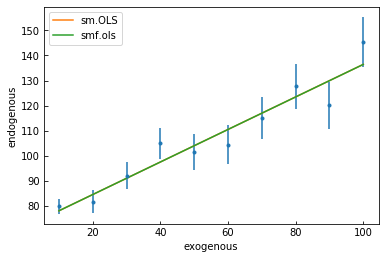

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();